In [33]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import datetime

In [34]:
df=pd.read_csv('kosmos_dataset.csv')

In [35]:
df.head(10)

,id,user_id,type,winner,round,player_cards,magic_used,hints_used,timestamp,length
0,6735680,134122,1,1,3,6,0,0,2018-11-03 00:00:05,94
1,6735687,89561,1,1,1,52,0,0,2018-11-03 00:00:00,148
2,6735688,6144,1,1,3,11,0,0,2018-11-03 00:00:01,126
3,6735689,4450,1,0,2,7,0,0,2018-11-03 00:00:08,109
4,6735690,87368,1,1,2,52,0,0,2018-11-03 00:00:14,104
5,6735694,133929,1,0,2,23,0,0,2018-11-03 00:00:04,129
6,6735695,203463,1,1,3,11,0,0,2018-11-03 00:00:09,111
7,6735696,20621,1,1,2,11,0,0,2018-11-03 00:00:11,99
8,6735697,202227,1,1,1,52,0,0,2018-11-03 00:00:17,222
9,6735703,196535,1,1,2,52,0,0,2018-11-03 00:00:05,87


In [36]:
df.tail(10)

,id,user_id,type,winner,round,player_cards,magic_used,hints_used,timestamp,length
3979478,10715172,167752,1,1,1,10,0,0,2018-12-03 23:59:46,135
3979479,10715173,3332,1,1,1,52,0,0,2018-12-03 23:59:47,224
3979480,10715174,171345,1,1,3,52,0,0,2018-12-03 23:59:55,73
3979481,10715175,84145,1,1,2,52,0,0,2018-12-03 23:59:58,84
3979482,10715179,77538,1,1,2,5,0,0,2018-12-03 23:59:52,209
3979483,10715217,94241,1,1,1,16,0,0,2018-12-03 23:59:40,141
3979484,10715218,73262,2,1,1,52,0,0,2018-12-03 23:59:44,116
3979485,10715219,204258,2,1,1,10,0,0,2018-12-03 23:59:45,129
3979486,10715220,82070,1,1,1,14,0,0,2018-12-03 23:59:48,182
3979487,10715221,25316,1,1,1,8,0,0,2018-12-03 23:59:59,167


In [37]:
df.dtypes

id               int64
user_id          int64
type             int64
winner           int64
round            int64
player_cards     int64
magic_used       int64
hints_used       int64
timestamp       object
length           int64
dtype: object

In [38]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [39]:
df.dtypes

id                       int64
user_id                  int64
type                     int64
winner                   int64
round                    int64
player_cards             int64
magic_used               int64
hints_used               int64
timestamp       datetime64[ns]
length                   int64
dtype: object

In [40]:
df['date']=df['timestamp'].apply(lambda x: x.date())

In [41]:
len(df.user_id)

3979488

In [42]:
df.user_id.nunique()

10947

In [43]:
df['round'].value_counts()

1    1541856
2    1372724
3    1033451
0      31408
5         49
Name: round, dtype: int64

In [44]:
df['type'].value_counts()

1    3440334
2     507746
3      23906
4       7502
Name: type, dtype: int64

In [45]:
users_per_day=df.groupby(['date'], as_index=False).\
                 agg({'user_id':'nunique', 
                      'id':'count',
                      'winner':'sum',
                      'player_cards':'mean',
                      'magic_used':'sum',
                      'hints_used':'sum',
                     'length':'mean'})

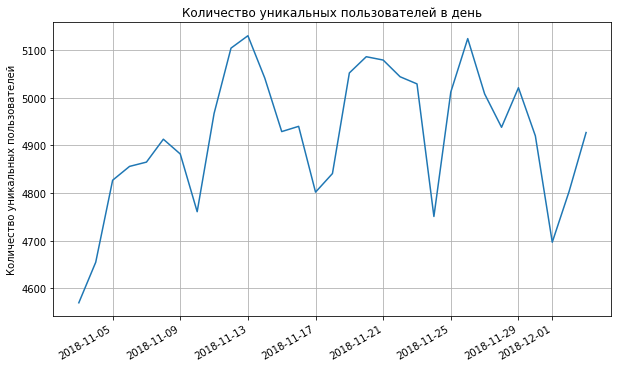

In [46]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.user_id)
ax.grid()
ax.set_ylabel('Количество уникальных пользователей')
ax.set_title('Количество уникальных пользователей в день')
fig.autofmt_xdate()

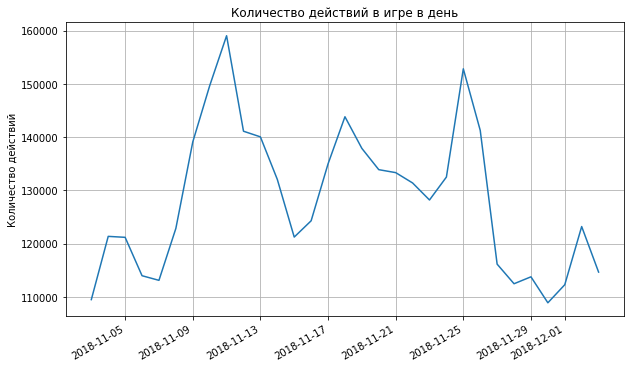

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.id)
ax.grid()
ax.set_ylabel('Количество действий')
ax.set_title('Количество действий в игре в день')
fig.autofmt_xdate()

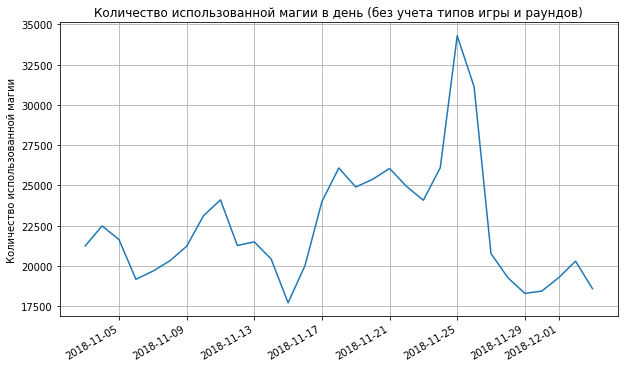

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.magic_used)
ax.grid()
ax.set_ylabel('Количество использованной магии')
ax.set_title('Количество использованной магии в день (без учета типов игры и раундов)')
fig.autofmt_xdate()

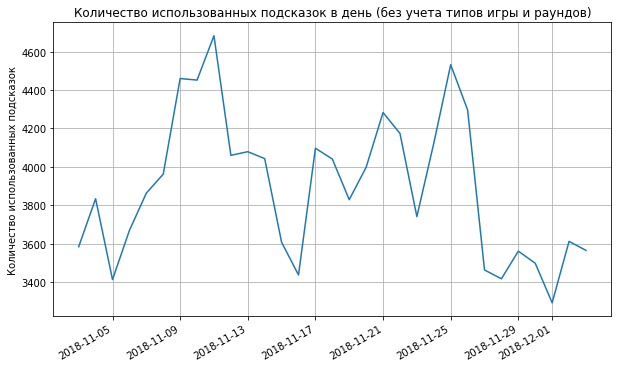

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.hints_used)
ax.grid()
ax.set_ylabel('Количество использованных подсказок')
ax.set_title('Количество использованных подсказок в день (без учета типов игры и раундов)')
fig.autofmt_xdate()

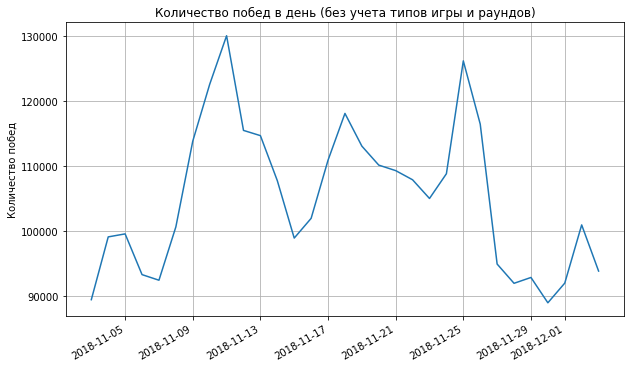

In [50]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.winner)
ax.grid()
ax.set_ylabel('Количество побед')
ax.set_title('Количество побед в день (без учета типов игры и раундов)')
fig.autofmt_xdate()

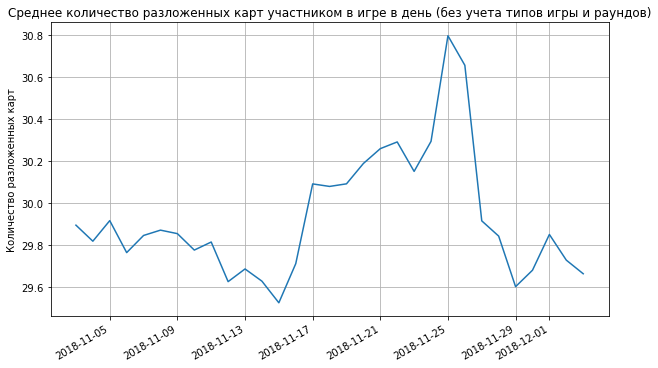

In [51]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.player_cards)
ax.grid()
ax.set_ylabel('Количество разложенных карт')
ax.set_title('Среднее количество разложенных карт участником в игре в день (без учета типов игры и раундов)')
fig.autofmt_xdate()

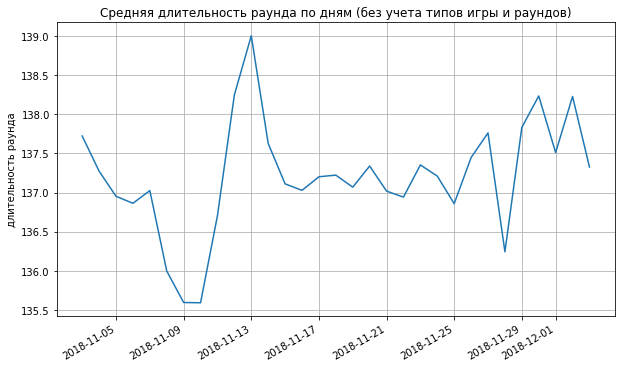

In [52]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(users_per_day.date, users_per_day.length)
ax.grid()
ax.set_ylabel('длительность раунда')
ax.set_title('Средняя длительность раунда по дням (без учета типов игры и раундов)')
fig.autofmt_xdate()

In [53]:
users_per_day_and_type=df.groupby(['date','type','round'], as_index=False).\
                           agg({'user_id':'nunique', 
                                  'id':'count',
                                  'winner':'sum',
                                'player_cards':'mean',
                                      'magic_used':'sum',
                                'hints_used':'sum',
                     'length':'mean'})

In [54]:
users_per_day_and_type.head(10)

,date,type,round,user_id,id,winner,player_cards,magic_used,hints_used,length
0,2018-11-03,1,1,4305,34657,32181,29.661771,4146,1066,143.217532
1,2018-11-03,1,2,4218,32184,25095,29.750062,6800,1099,137.285080
2,2018-11-03,1,3,3951,25099,20701,30.603889,5756,894,136.929041
3,2018-11-03,1,5,2,2,0,0.000000,0,0,137.000000
4,2018-11-03,2,1,1681,7978,5357,28.671096,1460,225,129.781524
5,2018-11-03,2,2,1414,5358,3192,29.881486,1611,161,127.113662
6,2018-11-03,2,3,1059,3190,2175,31.780251,1380,118,128.320376
7,2018-11-03,3,0,147,775,555,28.483871,55,16,129.170323
8,2018-11-03,4,0,151,216,178,29.226852,38,5,140.319444
9,2018-11-04,1,1,4418,38344,35624,29.408773,4224,1096,142.547622


In [55]:
users_per_day_and_type.tail(10)

,date,type,round,user_id,id,winner,player_cards,magic_used,hints_used,length
265,2018-12-02,3,0,183,763,565,29.669725,64,24,135.363041
266,2018-12-02,4,0,178,257,200,27.560311,20,19,143.992218
267,2018-12-03,1,1,4676,37288,34615,29.413484,3754,1035,142.284944
268,2018-12-03,1,2,4592,34606,26831,29.690025,6249,1138,136.027856
269,2018-12-03,1,3,4305,26839,21967,30.173553,5250,903,135.868140
270,2018-12-03,2,1,1619,7215,4864,28.612058,1143,213,131.453638
271,2018-12-03,2,2,1345,4864,2910,29.444285,1173,158,128.747738
272,2018-12-03,2,3,987,2905,1964,31.268503,917,97,131.039243
273,2018-12-03,3,0,158,698,513,27.650430,76,11,135.921203
274,2018-12-03,4,0,153,218,178,29.697248,34,10,149.233945


In [56]:
users_per_day_and_type[(users_per_day_and_type.type==3)]['round'].value_counts()

0    31
Name: round, dtype: int64

In [57]:
users_per_day_and_type[(users_per_day_and_type.type==4)]['round'].value_counts()

0    31
Name: round, dtype: int64

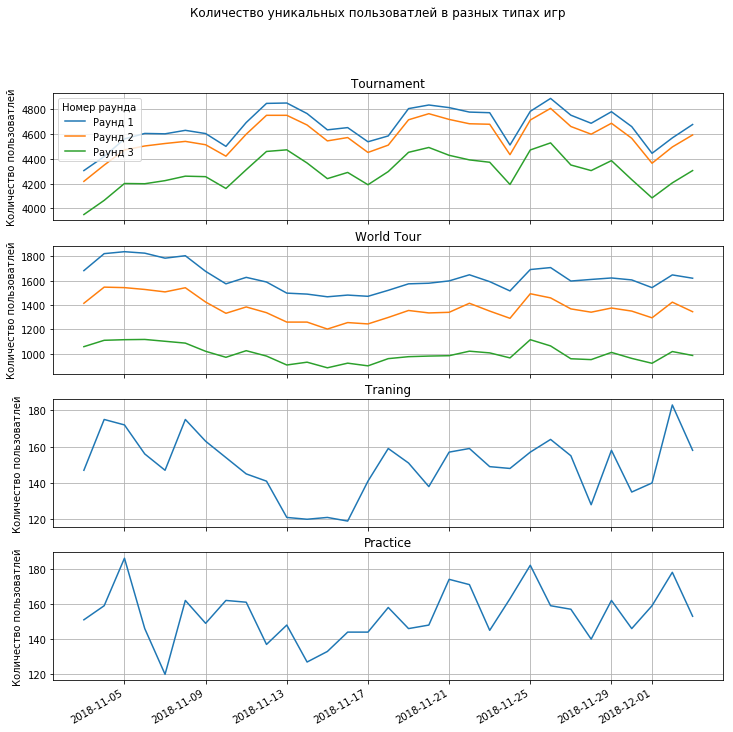

In [58]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].user_id)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].user_id)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].user_id)
ax_1.grid()
ax_1.set_ylabel('Количество пользоватлей')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].user_id)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].user_id)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].user_id)
ax_2.grid()
ax_2.set_ylabel('Количество пользоватлей')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].user_id)
ax_3.grid()
ax_3.set_ylabel('Количество пользоватлей')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].user_id)
ax_4.grid()
ax_4.set_ylabel('Количество пользоватлей')
ax_4.set_title('Practice')

fig.suptitle('Количество уникальных пользоватлей в разных типах игр')
fig.autofmt_xdate()
plt.savefig("user_id.jpeg")

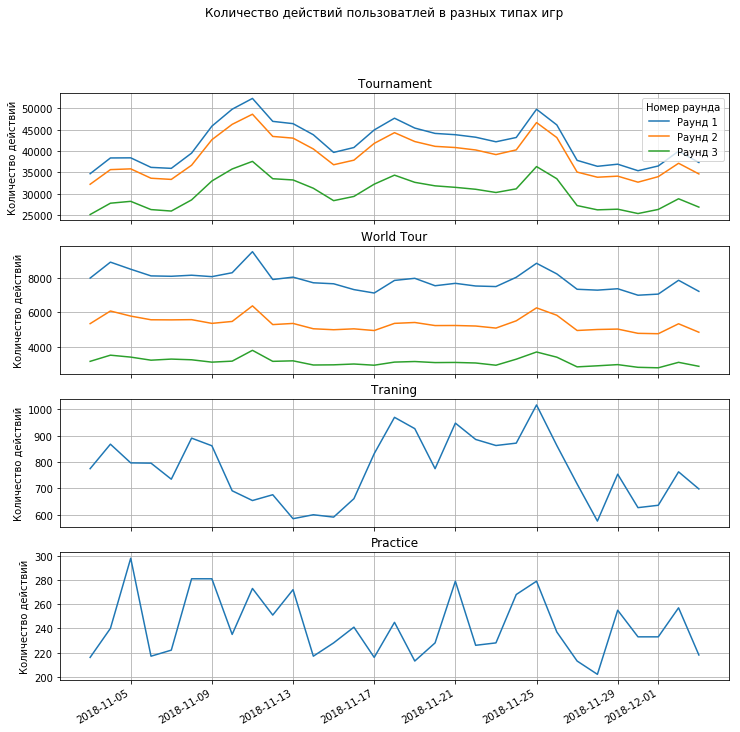

In [59]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].id)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].id)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].id)
ax_1.grid()
ax_1.set_ylabel('Количество действий')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].id)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].id)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].id)
ax_2.grid()
ax_2.set_ylabel('Количество действий')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].id)
ax_3.grid()
ax_3.set_ylabel('Количество действий')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].id)
ax_4.grid()
ax_4.set_ylabel('Количество действий')
ax_4.set_title('Practice')

fig.suptitle('Количество действий пользоватлей в разных типах игр')
fig.autofmt_xdate()
plt.savefig("id.jpeg")

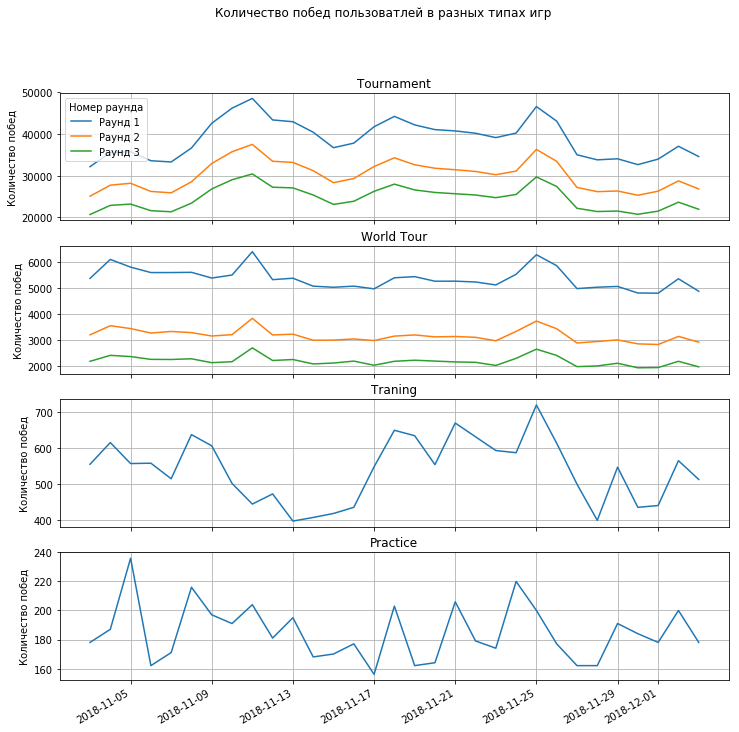

In [60]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].winner)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].winner)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].winner)
ax_1.grid()
ax_1.set_ylabel('Количество побед')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].winner)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].winner)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].winner)
ax_2.grid()
ax_2.set_ylabel('Количество побед')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].winner)
ax_3.grid()
ax_3.set_ylabel('Количество побед')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].winner)
ax_4.grid()
ax_4.set_ylabel('Количество побед')
ax_4.set_title('Practice')

fig.suptitle('Количество побед пользоватлей в разных типах игр')
fig.autofmt_xdate()
plt.savefig("winner.jpeg")

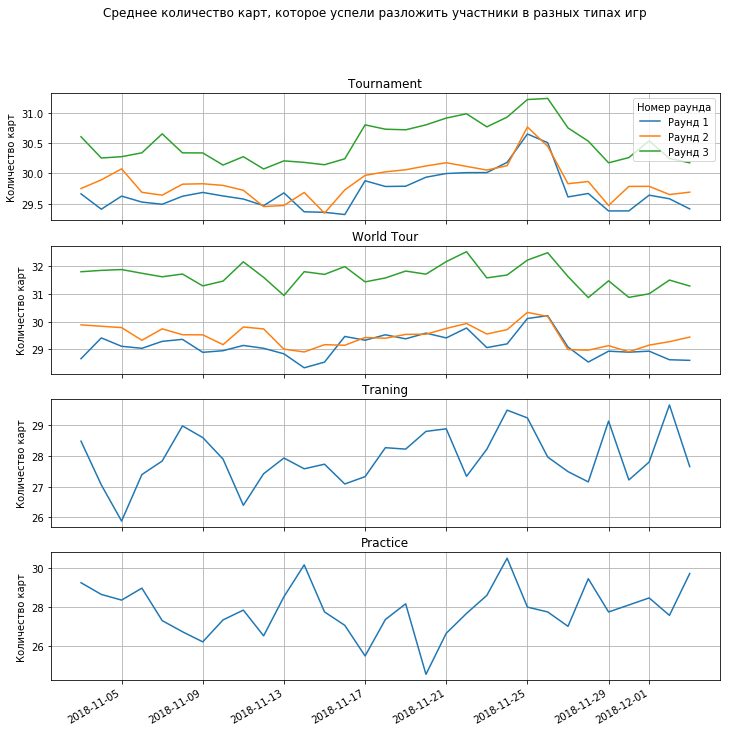

In [61]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].player_cards)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].player_cards)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].player_cards)
ax_1.grid()
ax_1.set_ylabel('Количество карт')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].player_cards)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].player_cards)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].player_cards)
ax_2.grid()
ax_2.set_ylabel('Количество карт')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].player_cards)
ax_3.grid()
ax_3.set_ylabel('Количество карт')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].player_cards)
ax_4.grid()
ax_4.set_ylabel('Количество карт')
ax_4.set_title('Practice')

fig.suptitle('Среднее количество карт, которое успели разложить участники в разных типах игр')
fig.autofmt_xdate()
plt.savefig("player_cards.jpeg")

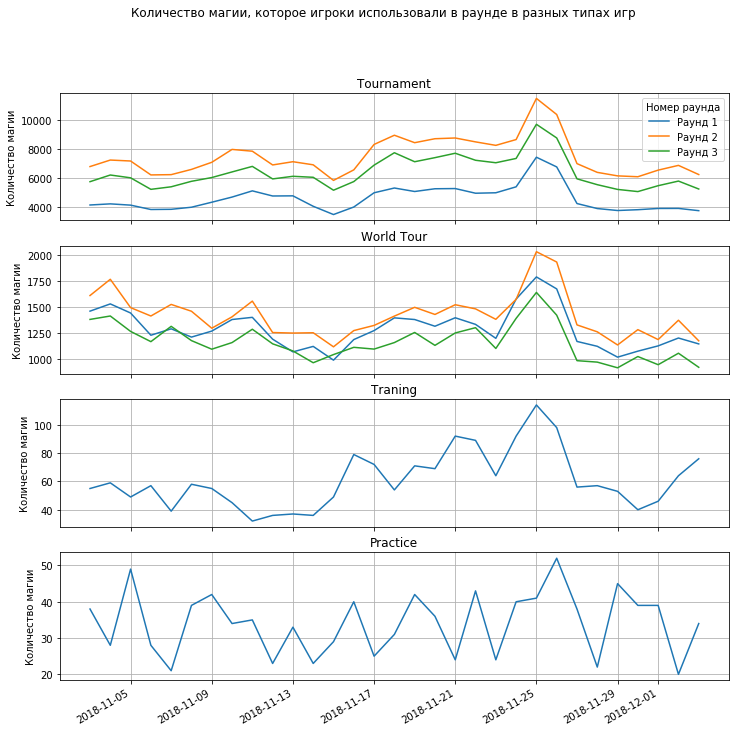

In [62]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].magic_used)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].magic_used)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].magic_used)
ax_1.grid()
ax_1.set_ylabel('Количество магии')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].magic_used)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].magic_used)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].magic_used)
ax_2.grid()
ax_2.set_ylabel('Количество магии')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].magic_used)
ax_3.grid()
ax_3.set_ylabel('Количество магии')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].magic_used)
ax_4.grid()
ax_4.set_ylabel('Количество магии')
ax_4.set_title('Practice')

fig.suptitle('Количество магии, которое игроки использовали в раунде в разных типах игр')
fig.autofmt_xdate()
plt.savefig("magic.jpeg")

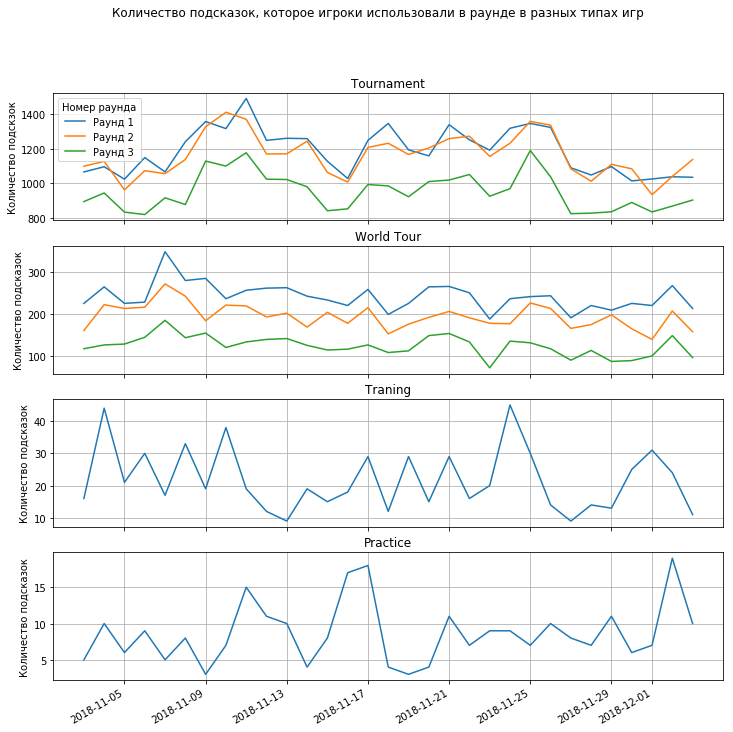

In [63]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].hints_used)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].hints_used)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].hints_used)
ax_1.grid()
ax_1.set_ylabel('Количество подскзок')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].hints_used)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].hints_used)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].hints_used)
ax_2.grid()
ax_2.set_ylabel('Количество подсказок')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].hints_used)
ax_3.grid()
ax_3.set_ylabel('Количество подсказок')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].hints_used)
ax_4.grid()
ax_4.set_ylabel('Количество подсказок')
ax_4.set_title('Practice')

fig.suptitle('Количество подсказок, которое игроки использовали в раунде в разных типах игр')
fig.autofmt_xdate()
plt.savefig("hints.jpeg")

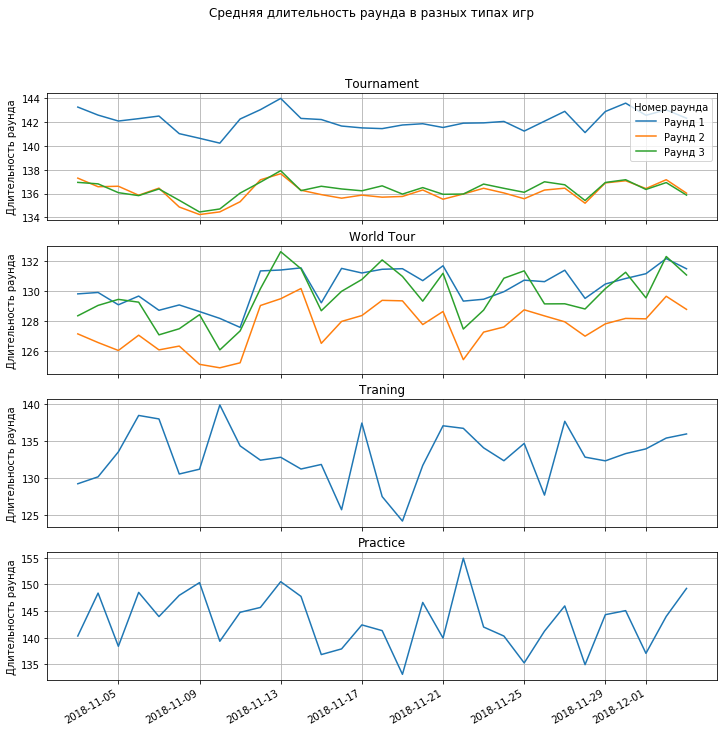

In [64]:
fig, (ax_1, ax_2, ax_3, ax_4) = plt.subplots(nrows=4, ncols=1, figsize=(12, 12))
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==1)].length)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==2)].length)
ax_1.plot(users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==1) & (users_per_day_and_type['round']==3)].length)
ax_1.grid()
ax_1.set_ylabel('Длительность раунда')
ax_1.legend(['Раунд 1', 'Раунд 2', 'Раунд 3'],title="Номер раунда", loc='best')
ax_1.set_title('Tournament')

ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==1)].length)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==2)].length)
ax_2.plot(users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].date, users_per_day_and_type[(users_per_day_and_type.type==2) & (users_per_day_and_type['round']==3)].length)
ax_2.grid()
ax_2.set_ylabel('Длительность раунда')
ax_2.set_title('World Tour')

ax_3.plot(users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==3) & (users_per_day_and_type['round']==0)].length)
ax_3.grid()
ax_3.set_ylabel('Длительность раунда')
ax_3.set_title('Traning')

ax_4.plot(users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].date, users_per_day_and_type[(users_per_day_and_type.type==4) & (users_per_day_and_type['round']==0)].length)
ax_4.grid()
ax_4.set_ylabel('Длительность раунда')
ax_4.set_title('Practice')

fig.suptitle('Средняя длительность раунда в разных типах игр')
fig.autofmt_xdate()
plt.savefig("length.jpeg")